In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/standardized.csv')

In [4]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
obj = data['rar']

In [6]:
X_scaled = data.drop(['rar'], axis=1, errors='ignore')

In [13]:
pca = PCA()
X_pca = pca.fit(X_scaled)

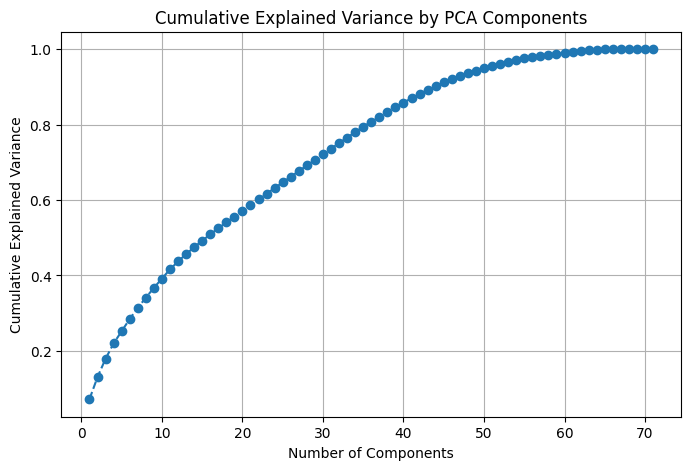

In [15]:
# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [17]:
# Choose the number of components that explain the desired amount of variance (e.g., 95%)
variance_threshold = 0.80
n_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
print(f'Number of components to retain {variance_threshold*100}% variance: {n_components}')

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(X_scaled)

# The reduced data now has `n_components` dimensions
print(reduced_data)

Number of components to retain 80.0% variance: 36
[[-0.99694908  2.14539106 -0.71768815 ... -0.17553495 -0.31919817
   0.06554586]
 [ 2.97114184 -0.05185234 -1.24947871 ... -0.49936903 -0.89339071
   1.50155306]
 [ 2.09840765 -0.32750306 -2.18378229 ...  0.13689958  1.97003042
   1.05432092]
 ...
 [ 3.15400027  0.35029079 -0.67529198 ...  0.07243367  3.24031351
   0.01564276]
 [ 0.86110485  3.26850387  0.68992005 ...  0.25444861  0.25592055
  -0.94940574]
 [-0.44914881  1.55293929  1.36484459 ... -0.12408312  0.3905822
   0.34972801]]


In [ ]:
X = pd.DataFrame(reduced_data)

In [ ]:
X

In [ ]:
X.to_csv('pca_df_36.csv')